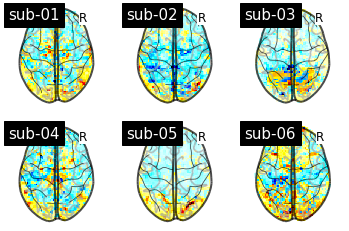

In [4]:
from nilearn import plotting
import matplotlib.pyplot as plt

subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06']
data = ['dsc180_contrasts\sub-01_run-all_effect_size.nii', 
        'dsc180_contrasts\sub-02_run-all_effect_size.nii',
       'dsc180_contrasts\sub-03_run-all_effect_size.nii',
       'dsc180_contrasts\sub-04_run-all_effect_size.nii',
       'dsc180_contrasts\sub-05_run-all_effect_size.nii',
       'dsc180_contrasts\sub-06_run-all_effect_size.nii',]
fig, axes = plt.subplots(nrows=2, ncols=3)
axes = axes.flatten()
for cidx, cmap in enumerate(data):
    plotting.plot_glass_brain(
        cmap,
        colorbar=False,
        title=subjects[cidx],
        axes=axes[cidx],
        plot_abs=False,
        display_mode='z',
    )
plt.show()

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.DataFrame(dict(intercept = np.ones(6)))

In [8]:
df

,intercept
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


In [9]:
from nilearn.glm.second_level import SecondLevelModel

In [10]:
SecondLevelModel?

In [11]:
second_level_model = SecondLevelModel()
second_level_model = second_level_model.fit(
    data,
    design_matrix=df,
)

In [12]:
z_map = second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='z_score',
)

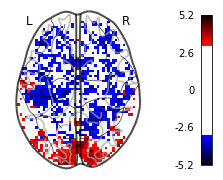

In [14]:
from scipy.stats import norm

p_val = 0.001
p001_unc = norm.isf(p_val)
display = plotting.plot_glass_brain(
    z_map,
    threshold=p001_unc,
    colorbar=True,
    display_mode='z',
    plot_abs=False,
)
plotting.show()
# Uncorrected p less than .001 = z +- 3.09

In [16]:
norm.isf?


In [17]:
p001_unc

3.090232306167813